In [1]:
import os

os.chdir(r'D:\subFinder')

In [2]:
import pandas as pd
import gensim
from Codes.Supervised_Trainer import run_end_to_end
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [112]:
# jf_marine = pd.read_csv(r"D:\subFinder\Data\Jinfang_Preds\tmp.marine.clean", sep = "\t", header = None)

In [113]:
# jf_oral = pd.read_csv(r"D:\subFinder\Data\Jinfang_Preds\tmp.oral.clean", sep = "\t", header = None)

In [114]:
# jf_rumen = pd.read_csv(r"D:\subFinder\Data\Jinfang_Preds\tmp.rumen.clean", sep = "\t", header = None)

In [3]:
jf_uhgg = pd.read_csv(r"D:\subFinder\Data\Jinfang_Preds\tmp.uhgg.clean", sep = "\t", header = None)

In [116]:
# jf_all = pd.concat([jf_marine, jf_oral, jf_rumen, jf_uhgg], 0, ignore_index = True)

In [117]:
# jf_all = jf_all[[1,2,3,4]]

In [4]:
jf_uhgg = jf_uhgg[[1,2,3,4]]

In [5]:
jf_uhgg.columns = ["cgc_id", "sig_gene_seq", "PULid", "high_level_substr"]

In [6]:
jf_uhgg.head()

,cgc_id,sig_gene_seq,PULid,high_level_substr
0,MGYG000000001_14|CGC1,"CBM34|GH77|GH13|GH13_39,GT35,GT5,null,null,GH1...",X,alpha-glucan
1,MGYG000000002_3|CGC1,"9.A.11.1.1,9.A.11.1.1,null,9.A.11.1.1,Aminotra...",X,starch
2,MGYG000000003_2|CGC3,"1.B.14.6.1,GH130,2.A.21.3.19,HTH_AraC+HTH_AraC...",X,beta-mannan
3,MGYG000000003_2|CGC11,"PL12|PL12_2,PL12|PL12_2,PL13,null,1.B.14.6.1,n...",X,host glycan
4,MGYG000000007_1|CGC1,"GH13_31|GH13,GH13|CBM34|GH13_20,3.A.1.1.20,3.A...",X,starch


In [7]:
jf_uhgg = jf_uhgg.drop_duplicates("cgc_id")

In [8]:
jf_uhgg.shape

(27195, 4)

In [9]:
jf_uhgg["cgc_id"].nunique()

27195

In [10]:
jf_uhgg.columns = ["cgc_id", "sig_gene_seq", "PULid", "JF_high_level_substr"]

In [11]:
## read subfinder output
subfinder_uhgg = pd.read_csv(r"Data/Output/Predictions/Predictions_UHGG_with_probability_and_p_values_Blast_Style_new_sup_new_unsup.csv")

In [12]:
subfinder_uhgg.shape

(470888, 4)

In [13]:
subfinder_uhgg["sequence"].nunique()

58861

In [14]:
subfinder_uhgg.head()

,sequence,substrate,probability_score,p_value
0,"1.A.1,2.A.9,null,9.B.168,1.A.62,GT51,9.B.186",alginate,0.198667,0.999969
1,"1.A.1,2.A.9,null,9.B.168,1.A.62,GT51,9.B.186",beta-glucan,0.262000,0.999969
2,"1.A.1,2.A.9,null,9.B.168,1.A.62,GT51,9.B.186",capsule polysaccharide synthesis,0.262667,0.999969
3,"1.A.1,2.A.9,null,9.B.168,1.A.62,GT51,9.B.186",cellulose,0.314667,0.999969
4,"1.A.1,2.A.9,null,9.B.168,1.A.62,GT51,9.B.186",host glycan,0.257333,0.999969


In [15]:
subfinder_uhgg.columns = ["sequence", "subFinder_high_level_substr", "probability_score", "p_value"]

In [16]:
len(subfinder_uhgg.groupby('sequence')['probability_score'].idxmax().values)

58861

In [17]:
subfinder_uhgg_preds = subfinder_uhgg.iloc[subfinder_uhgg.groupby('sequence')['probability_score'].idxmax().values,:]

In [18]:
subfinder_uhgg_preds = subfinder_uhgg_preds.reset_index(drop = True)

In [19]:
subfinder_uhgg_preds.head()

,sequence,subFinder_high_level_substr,probability_score,p_value
0,"1.A.1,2.A.9,null,9.B.168,1.A.62,GT51,9.B.186",starch,0.338000,0.999969
1,"1.A.1,2.A.9,null,null,9.B.168,1.A.62,GT51,9.B.186",pectin,0.319333,0.999969
2,"1.A.1,9.B.10,null,null,AA10",beta-glucan,0.316000,0.999969
3,"1.A.1,9.B.143,GH13_20",starch,0.433333,0.999512
4,"1.A.1,9.B.23,null,9.A.40,GH12",cellulose,0.327333,0.999969


In [20]:
subfinder_uhgg_preds

,sequence,subFinder_high_level_substr,probability_score,p_value
0,"1.A.1,2.A.9,null,9.B.168,1.A.62,GT51,9.B.186",starch,0.338000,0.999969
1,"1.A.1,2.A.9,null,null,9.B.168,1.A.62,GT51,9.B.186",pectin,0.319333,0.999969
2,"1.A.1,9.B.10,null,null,AA10",beta-glucan,0.316000,0.999969
3,"1.A.1,9.B.143,GH13_20",starch,0.433333,0.999512
4,"1.A.1,9.B.23,null,9.A.40,GH12",cellulose,0.327333,0.999969
...,...,...,...,...
58856,"SLH,null,GH36,GH36,1.B.52,GH94,LacI,null,3.A.7",starch,0.512000,0.303619
58857,"SLH|CBM54,GH2,HTH_5,3.A.1,3.A.1",starch,0.444000,0.996307
58858,"SLH|CBM54|GH26|CBM27|CBM23,null,1.B.52",cellulose,0.502667,0.500000
58859,"SLH|GH25,2.A.7",starch,0.318000,0.999969


In [21]:
to_keep = subfinder_uhgg_preds["subFinder_high_level_substr"].unique()

In [22]:
uhgg_data = pd.read_csv(r"Data/Output/Unsupervised_10_12/output_UHGG.csv")

In [23]:
uhgg_data = uhgg_data.drop_duplicates("sequence")

In [24]:
subfinder_uhgg_preds = subfinder_uhgg_preds.merge(uhgg_data, how = "left", on = "sequence")

In [25]:
subfinder_uhgg_preds.shape

(58861, 5)

In [26]:
subfinder_uhgg_preds.head()

,sequence,subFinder_high_level_substr,probability_score,p_value,cgc_id
0,"1.A.1,2.A.9,null,9.B.168,1.A.62,GT51,9.B.186",starch,0.338000,0.999969,MGYG000001364_9|CGC5
1,"1.A.1,2.A.9,null,null,9.B.168,1.A.62,GT51,9.B.186",pectin,0.319333,0.999969,MGYG000003693_29|CGC2
2,"1.A.1,9.B.10,null,null,AA10",beta-glucan,0.316000,0.999969,MGYG000001436_2|CGC28
3,"1.A.1,9.B.143,GH13_20",starch,0.433333,0.999512,MGYG000000173_1|CGC1
4,"1.A.1,9.B.23,null,9.A.40,GH12",cellulose,0.327333,0.999969,MGYG000000227_6|CGC6


In [28]:
len(set(subfinder_uhgg_preds["cgc_id"]).intersection(jf_uhgg["cgc_id"]))

19760

In [29]:
jf_uhgg_to_kepp = jf_uhgg[jf_uhgg["cgc_id"].isin(subfinder_uhgg_preds["cgc_id"])]

In [30]:
# jf_uhgg_to_kepp = jf_uhgg[jf_uhgg["JF_high_level_substr"].isin(to_keep)]

In [31]:
overlapped = subfinder_uhgg_preds.merge(jf_uhgg_to_kepp[["cgc_id", "JF_high_level_substr"]], how = "inner", on = ["cgc_id"])

In [32]:
overlapped.head()

,sequence,subFinder_high_level_substr,probability_score,p_value,cgc_id,JF_high_level_substr
0,"1.A.1,CE4,3.A.1,3.A.1,3.A.1,Peripla_BP_2,3.A.1",starch,0.414000,0.999969,MGYG000003723_14|CGC2,arabinan
1,"1.A.1,GGDEF,GH32,null,null,GH36,2.A.2,GH2",pectin,0.562667,0.000488,MGYG000000325_14|CGC1,alpha-galactan
2,"1.A.1,GH13_31,HTH_AraC,8.A.59,SBP_bac_1,3.A.1,...",starch,0.722667,0.000000,MGYG000000735_30|CGC1,starch
3,"1.A.1,GH42,LacI,2.A.2,GH36,GntR,null,3.A.1,3.A...",starch,0.602667,0.000000,MGYG000002286_4|CGC3,alpha-galactan
4,"1.A.1,null,null,3.D.4,3.D.4,null,null,2.A.47,n...",capsule polysaccharide synthesis,0.707333,0.000000,MGYG000003387_5|CGC5,capsule polysaccharide synthesis


In [33]:
overlapped.shape

(19760, 6)

In [34]:
np.mean(overlapped["subFinder_high_level_substr"] == overlapped["JF_high_level_substr"])

0.42773279352226723

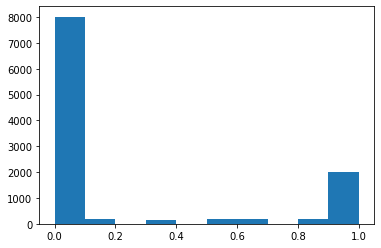

In [145]:
plt.hist(overlapped["p_value"])
plt.show()

In [146]:
thresholded = subfinder_uhgg_preds[subfinder_uhgg_preds["p_value"] <= 0.2]

In [147]:
thresholded_overlapped = thresholded.merge(jf_uhgg_to_kepp[["cgc_id", "JF_high_level_substr"]], how = "inner", on = ["cgc_id"])

In [148]:
thresholded_overlapped.shape

(8188, 6)

In [149]:
np.mean(thresholded_overlapped["subFinder_high_level_substr"] == thresholded_overlapped["JF_high_level_substr"])

0.8544211040547142